### 사용할 라이브러리들을 정의한다.

In [1]:
import warnings; warnings.filterwarnings("ignore");

from sklearn import svm
from sklearn import tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 레드 와인에 대한 데이터 전처리

In [2]:
red_wine = pd.read_csv('wine/winequality-red.csv', delimiter=',')
column = (red_wine.drop('quality', axis=1)).columns
categorical_features = ['quality']
continuous_features = column
for col in categorical_features:
    dummies = pd.get_dummies(red_wine[col], prefix=col)
    red_wine = pd.concat([red_wine, dummies], axis=1)
    red_wine.drop(col, axis=1, inplace=True)
red_wine.head()
sc = MinMaxScaler()
sc.fit(red_wine)
data_transformed = sc.transform(red_wine)

### K-평균 알고리즘을 통해 군집화를 시행한다.

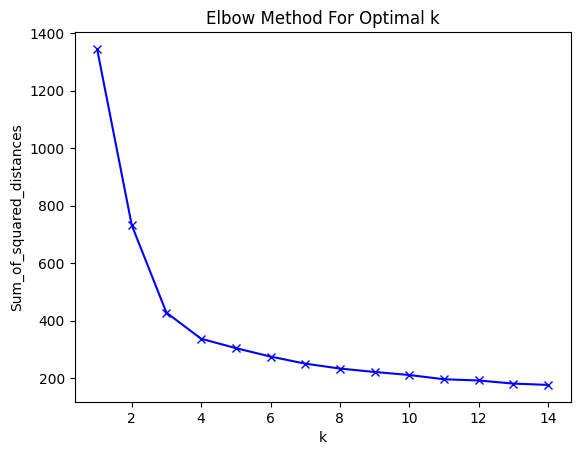

In [3]:
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(data_transformed)
  sum_of_squared_distances.append(km.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

그래프로 보아, 4개~6개의 군집이 가장 최적임을 추정할 수 있다. 너무 적은 군집은 군집과 데이터들의 거리가 너무 멀고, 너무 많은 군집은 너무 자세하게 군집화되어 거리는 가깝지만 데이터의 특성을 반영하지 못한다.

### PCA

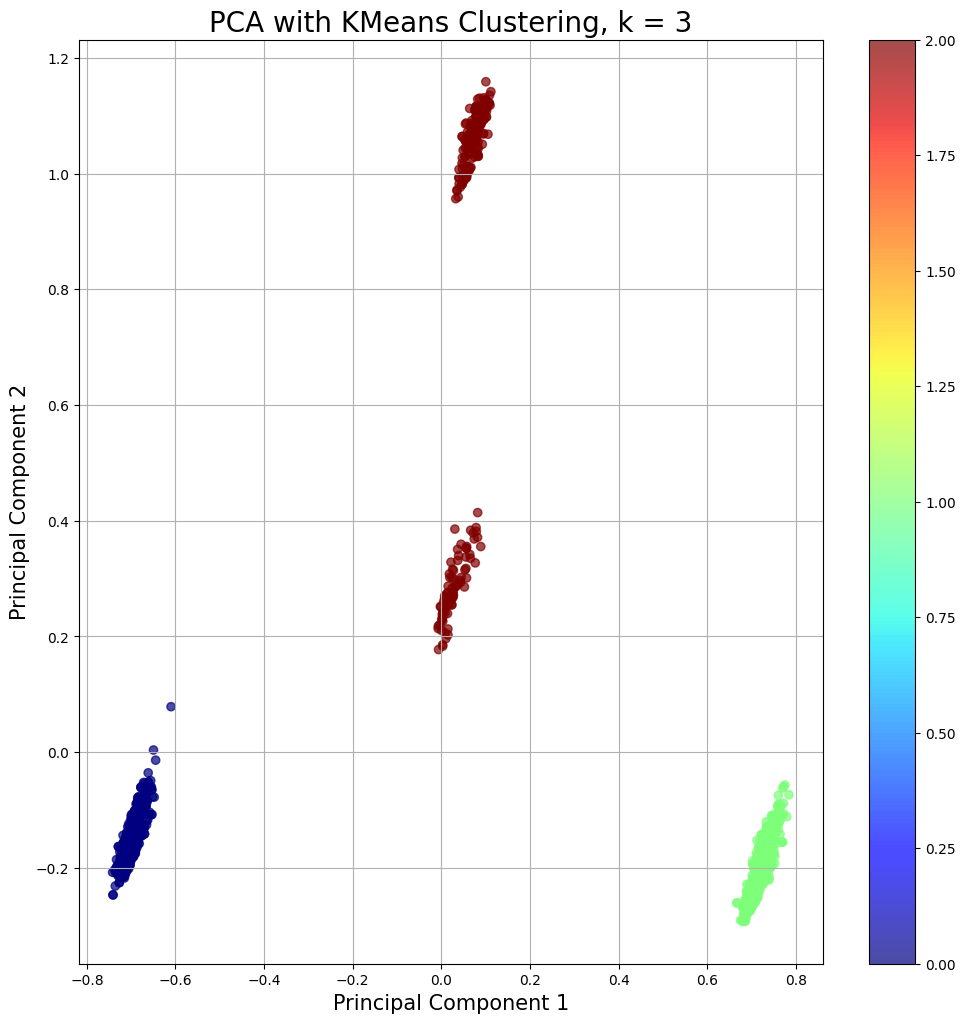

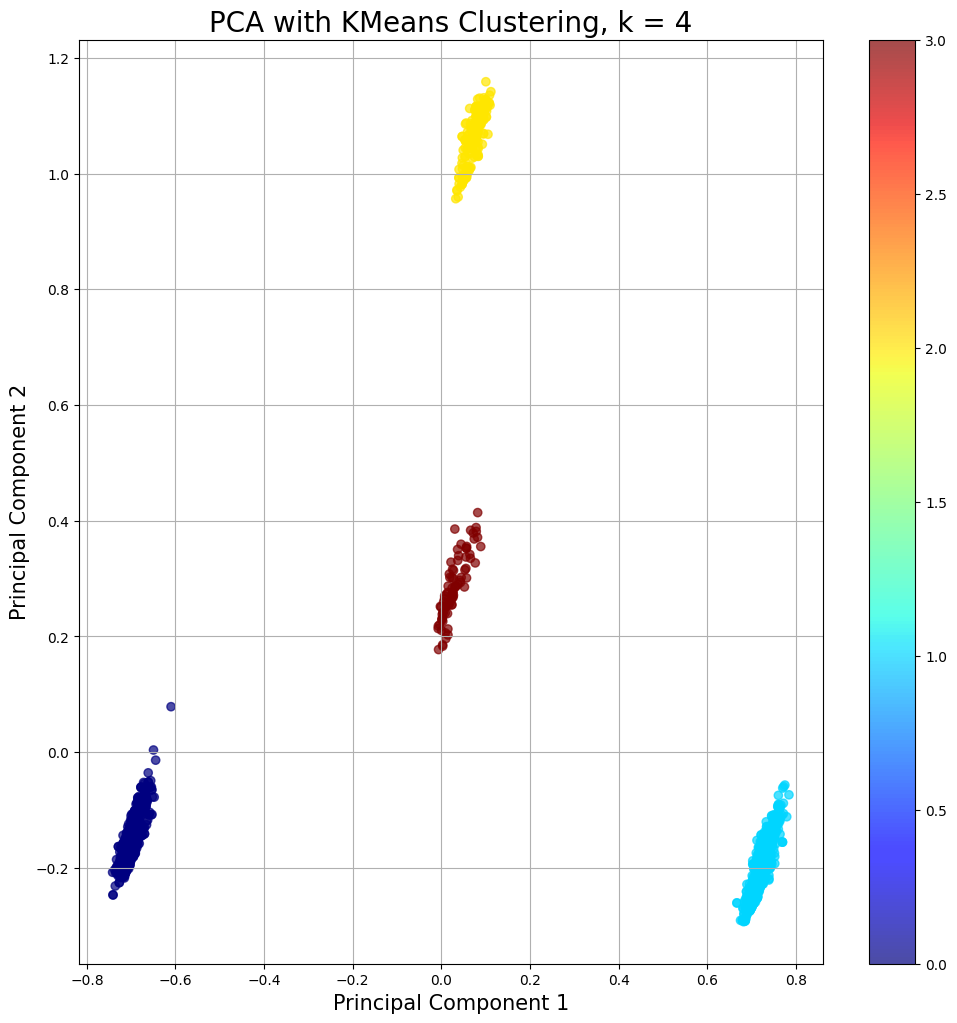

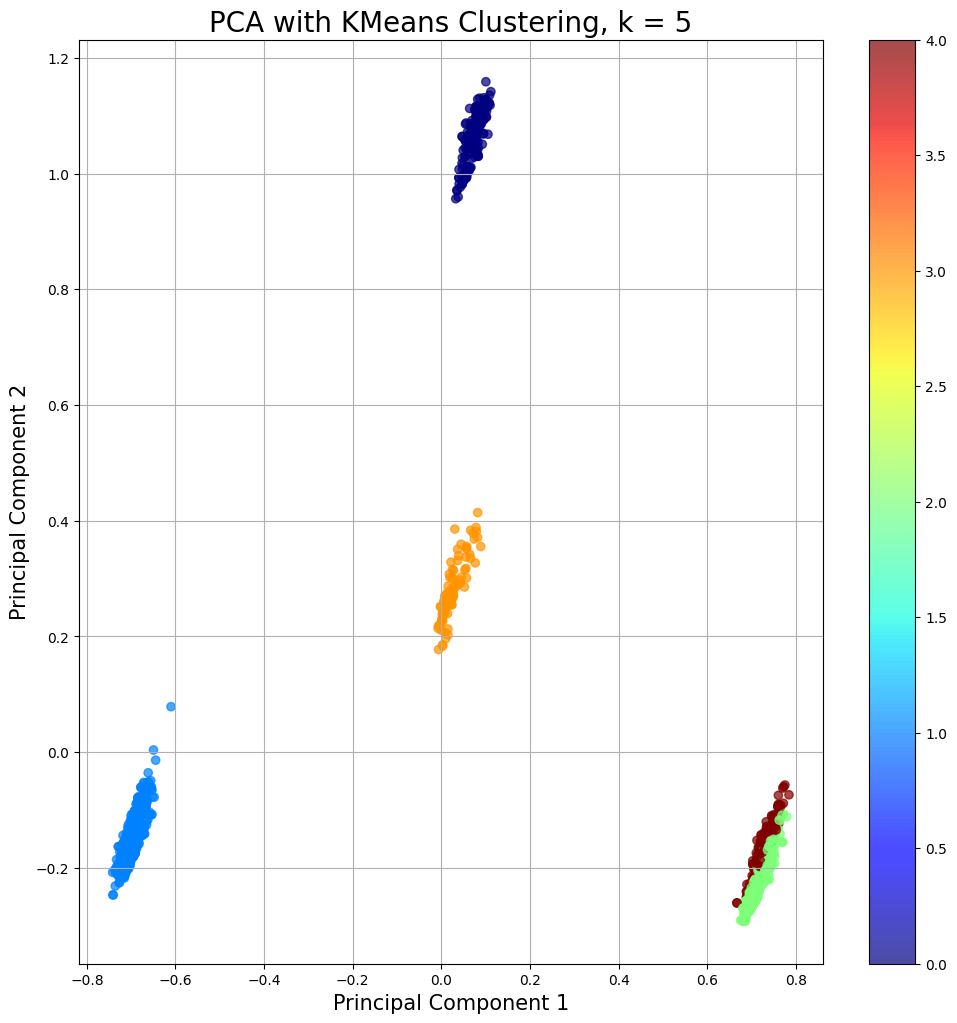

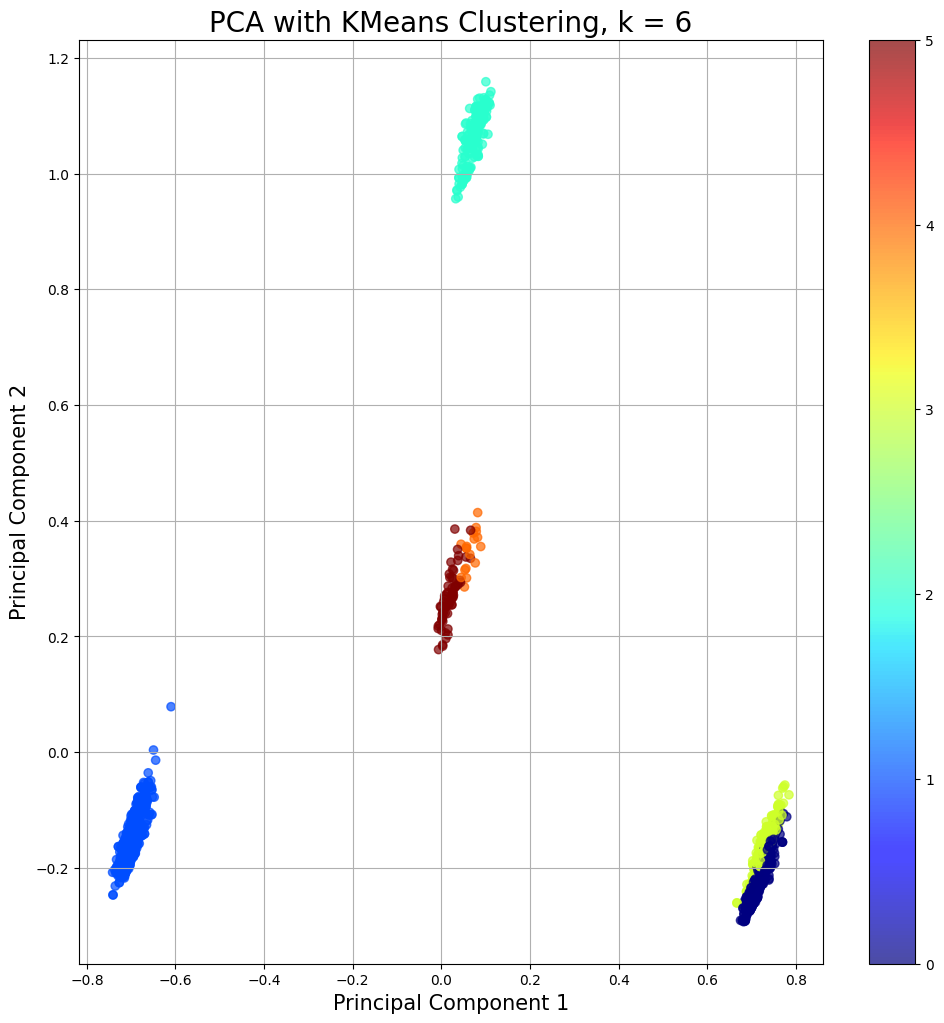

In [4]:
for k in [3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(data_transformed)
    labels = kmeans.labels_
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(data_transformed)
    principalDf = pd.DataFrame(data = principalComponents,
    columns = ['principal component 1', 'principal component 2'])
    fig = plt.figure(figsize = (12,12))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ss = ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'], alpha=0.7, c=labels, cmap='jet')
    plt.title('PCA with KMeans Clustering, k = ' + str(k), fontsize = 20)
    plt.colorbar(ss)
    ax.grid()

주성분 분석을 수행한 결과, 서로 명확하게 분리되는 군집이 4개가 있음을 알 수 있고, 따라서 위의 결과 중 k=4가 가장 최적임을 보여준다.

k가 4 미만이라면, 명확하게 분리가 되는 군집이더라도, 서로 거리가 가까운 군집 두 개를 하나의 군집으로 군집화 할 것이고, k가 4 초과라면 하나의 군집을 두개의 군집으로 나눌 것이다.

### t-SNE

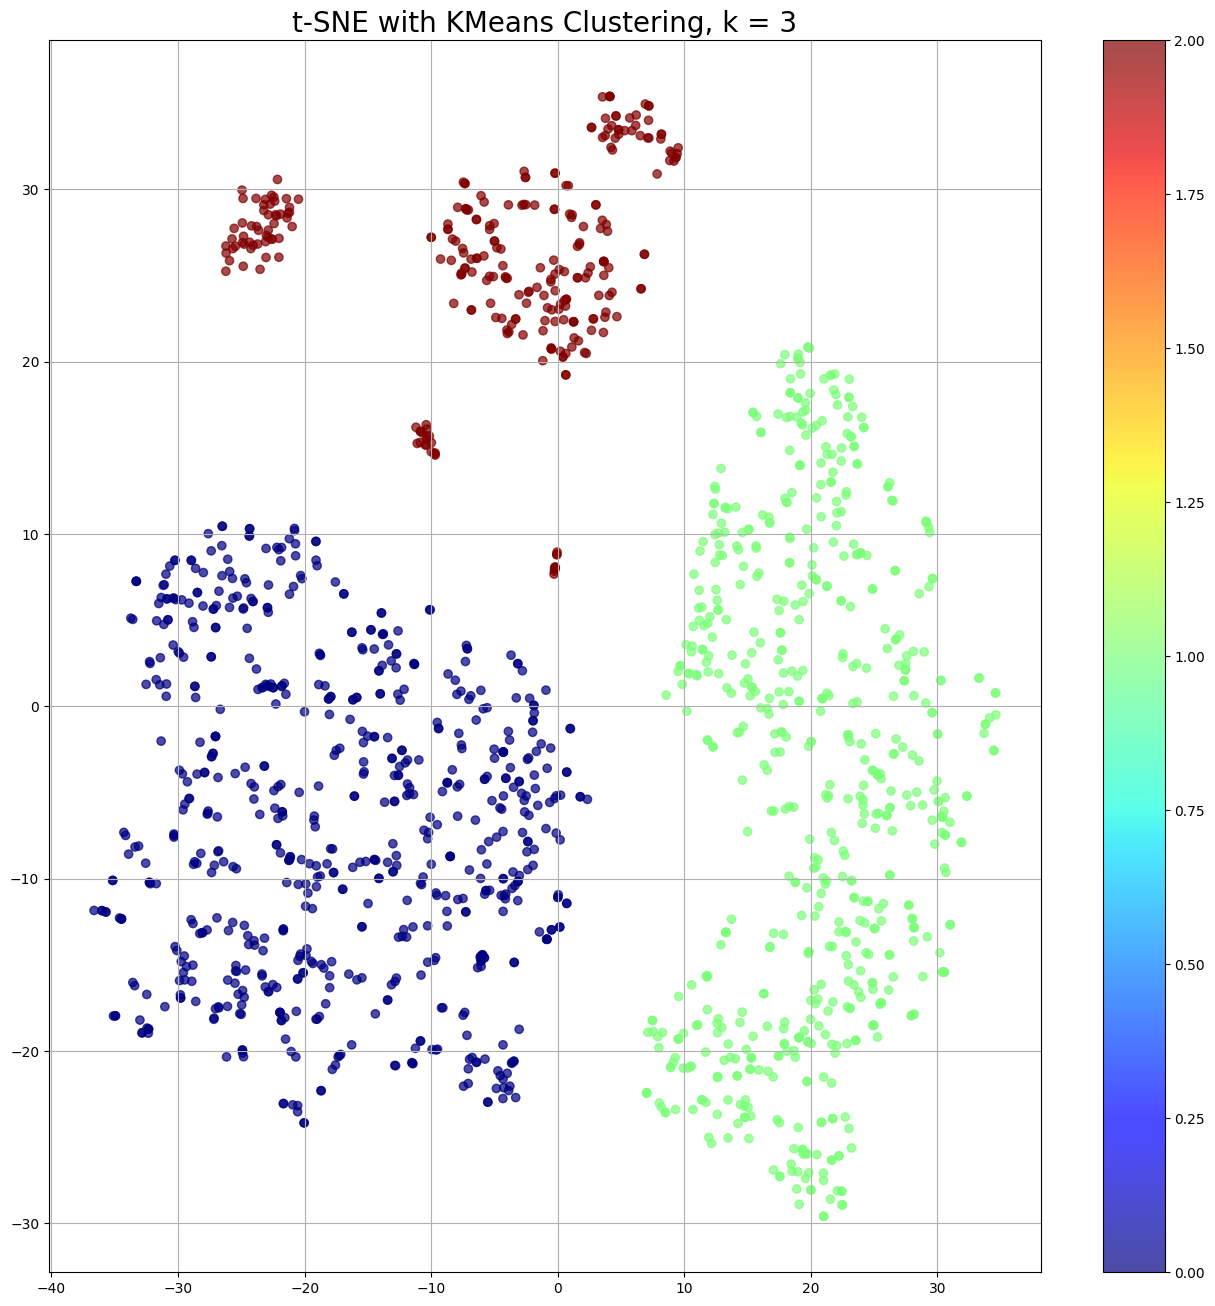

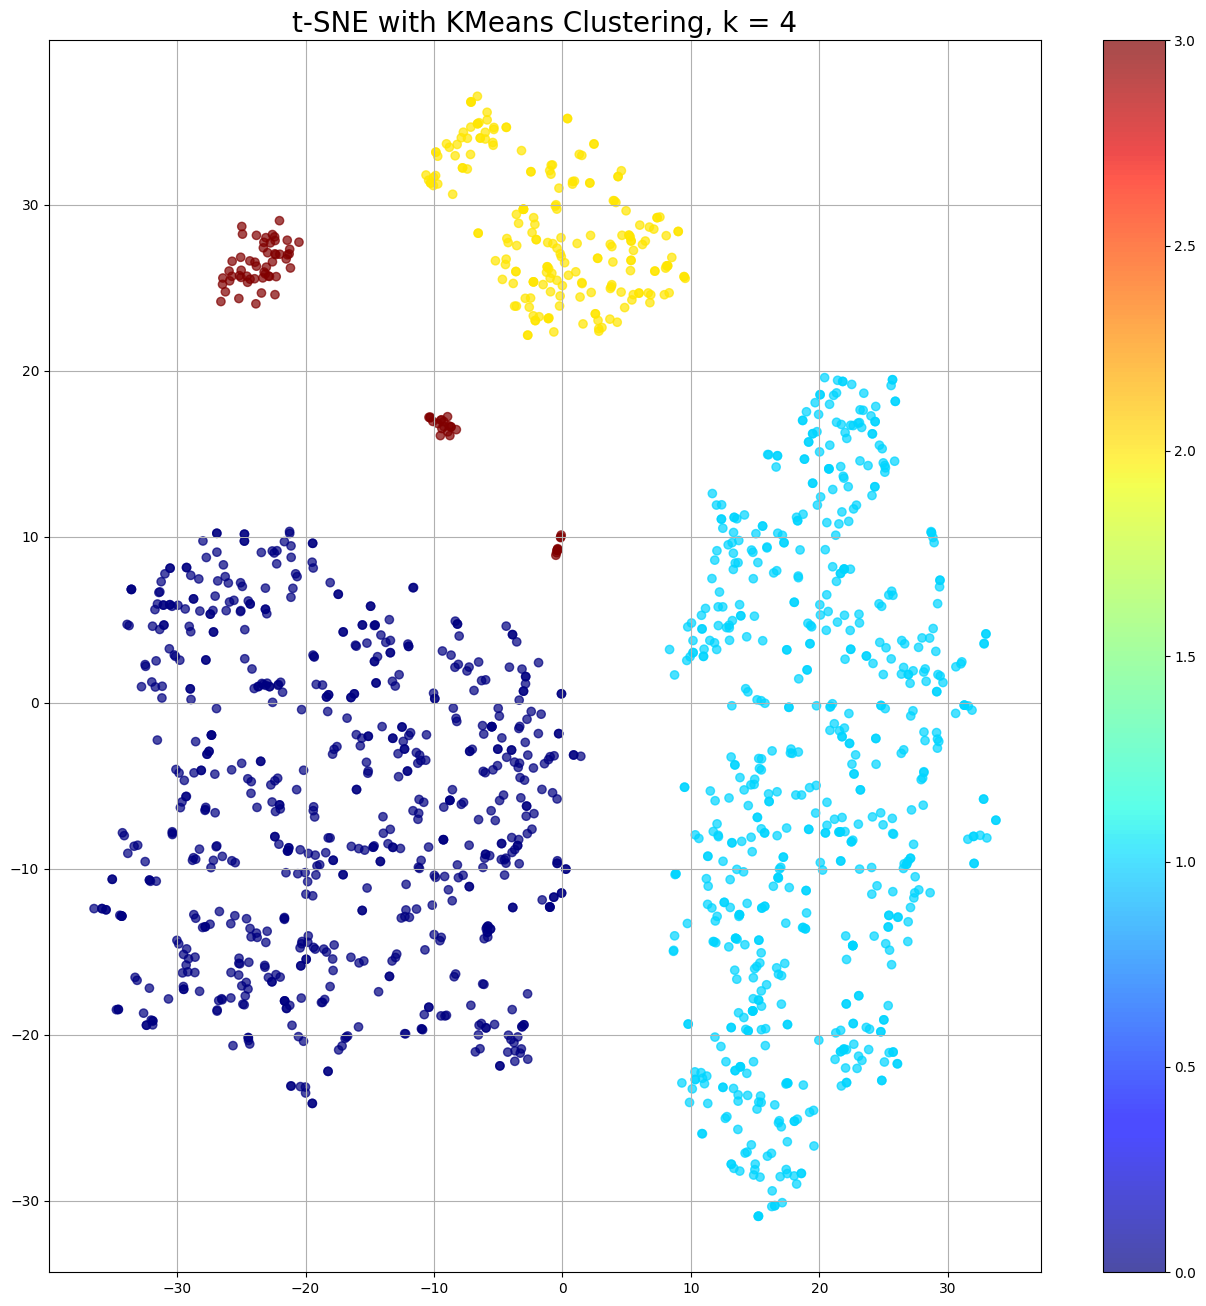

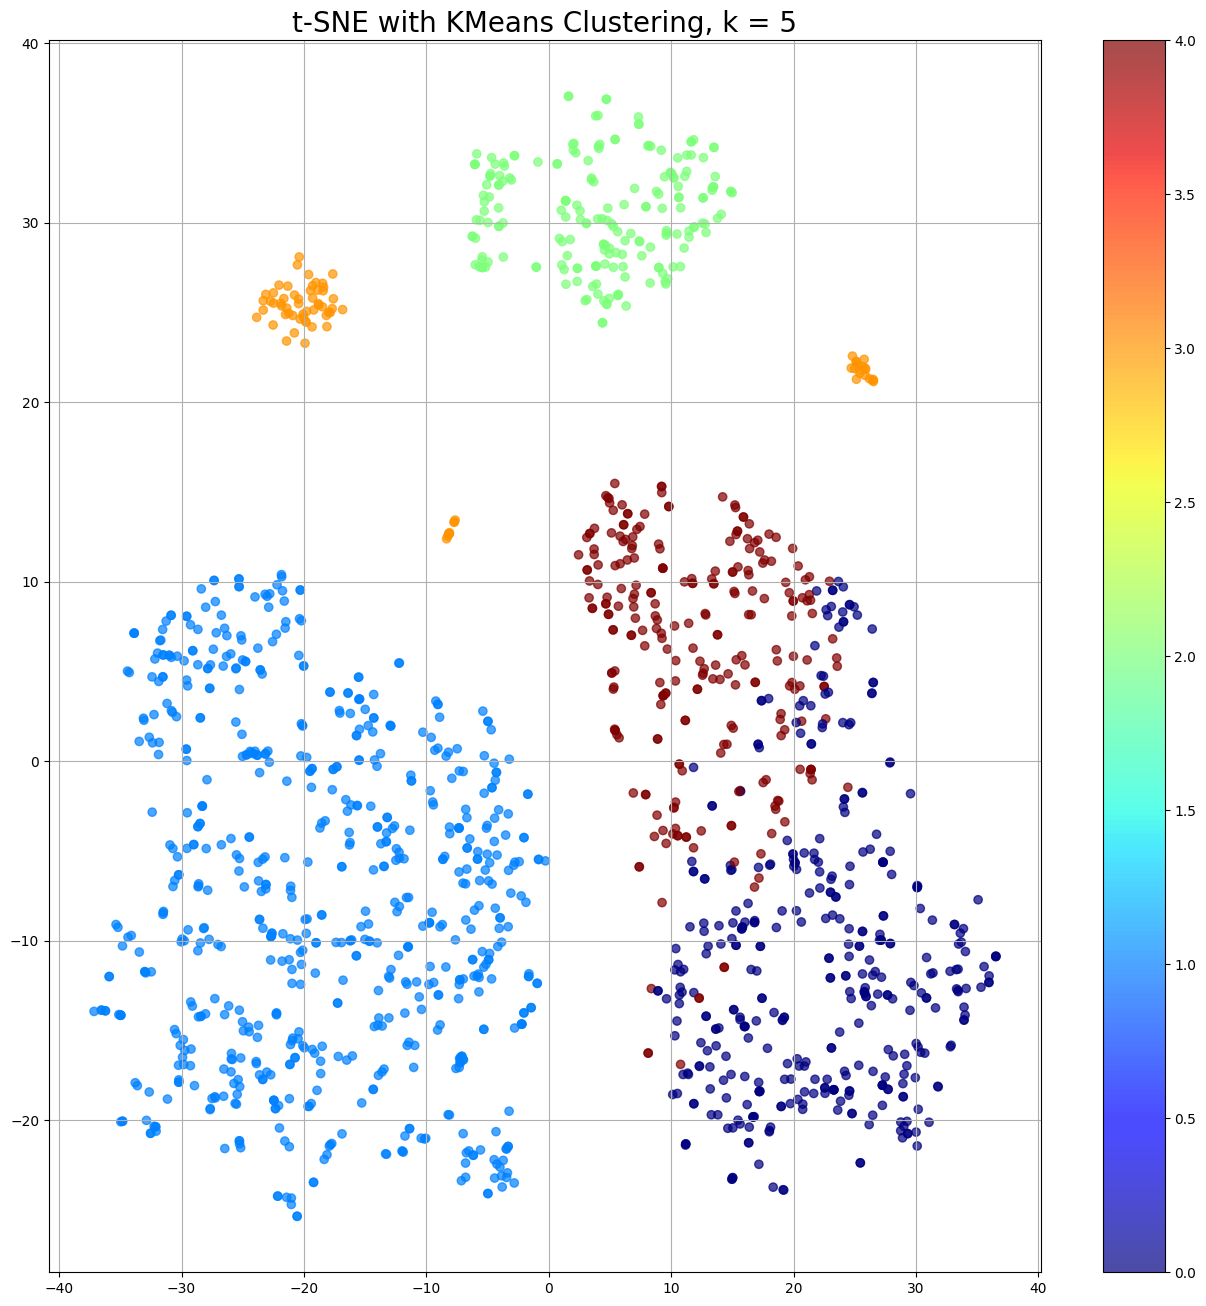

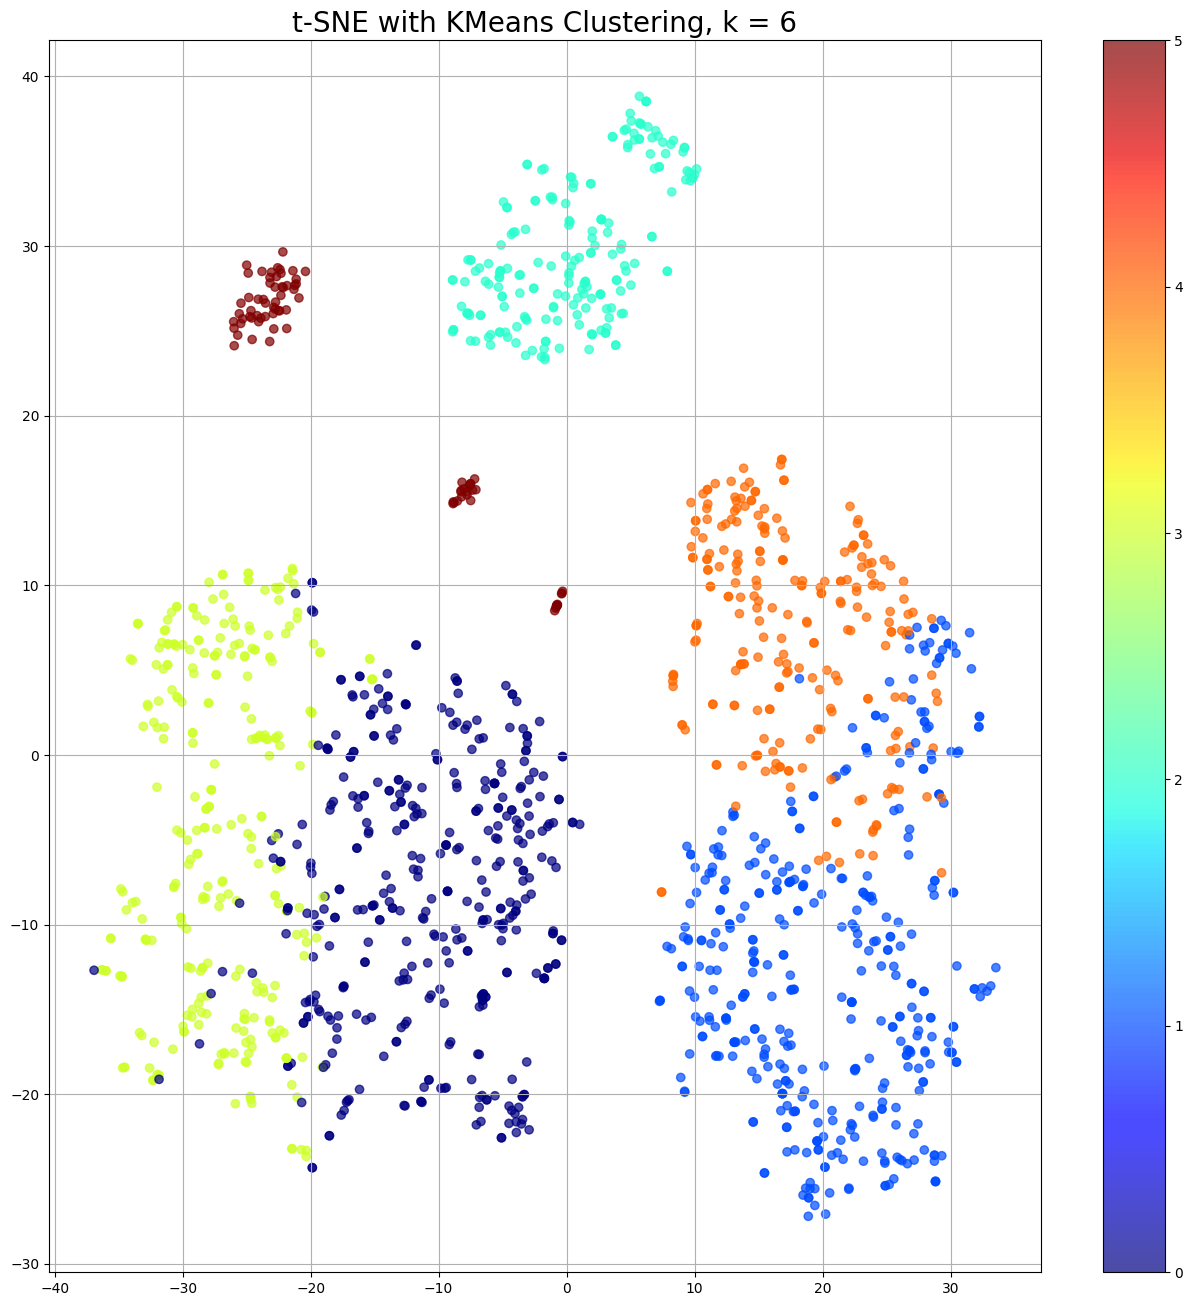

In [5]:
for k in [3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(data_transformed)
    labels = kmeans.labels_
    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=500)
    low_dim_embs = tsne.fit_transform(data_transformed)
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(1,1,1)
    # ax.set_title('Wine TSNE', fontsize = 20)
    ss = ax.scatter(low_dim_embs[:,0], low_dim_embs[:,1],
    alpha=0.7, c=labels, cmap='jet')
    plt.title('t-SNE with KMeans Clustering, k = ' + str(k), fontsize = 20)
    plt.colorbar(ss)
    ax.grid()

PCA와 마찬가지로, k=4에서 가장 최적임을 확인할 수 있다. PCA는 상대적으로 군집이 오밀조밀하게 형성되도록 표현되는 반면, t-SNE는 넓게 분산되어 표현된다. 이것이 더 정확한 표현이다.

## White Wine

In [6]:
white_wine = pd.read_csv('wine/winequality-white.csv', delimiter =';')
column = (white_wine.drop('quality', axis=1)).columns
categorical_features = ['quality']
continuous_features = column
for col in categorical_features:
  dummies = pd.get_dummies(white_wine[col], prefix=col)
  white_wine = pd.concat([white_wine, dummies], axis=1)
  white_wine.drop(col, axis=1, inplace=True)
white_wine.head()
mms = MinMaxScaler()
mms.fit(white_wine)
data_transformed = mms.transform(white_wine)

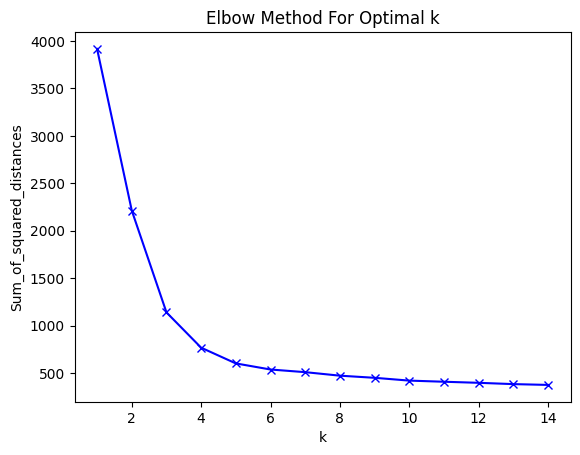

In [7]:
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(data_transformed)
  sum_of_squared_distances.append(km.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

레드 와인과 마찬가지로 k=4~6에서 최적값이 있을 것임을 추정할 수 있다.

### PCA

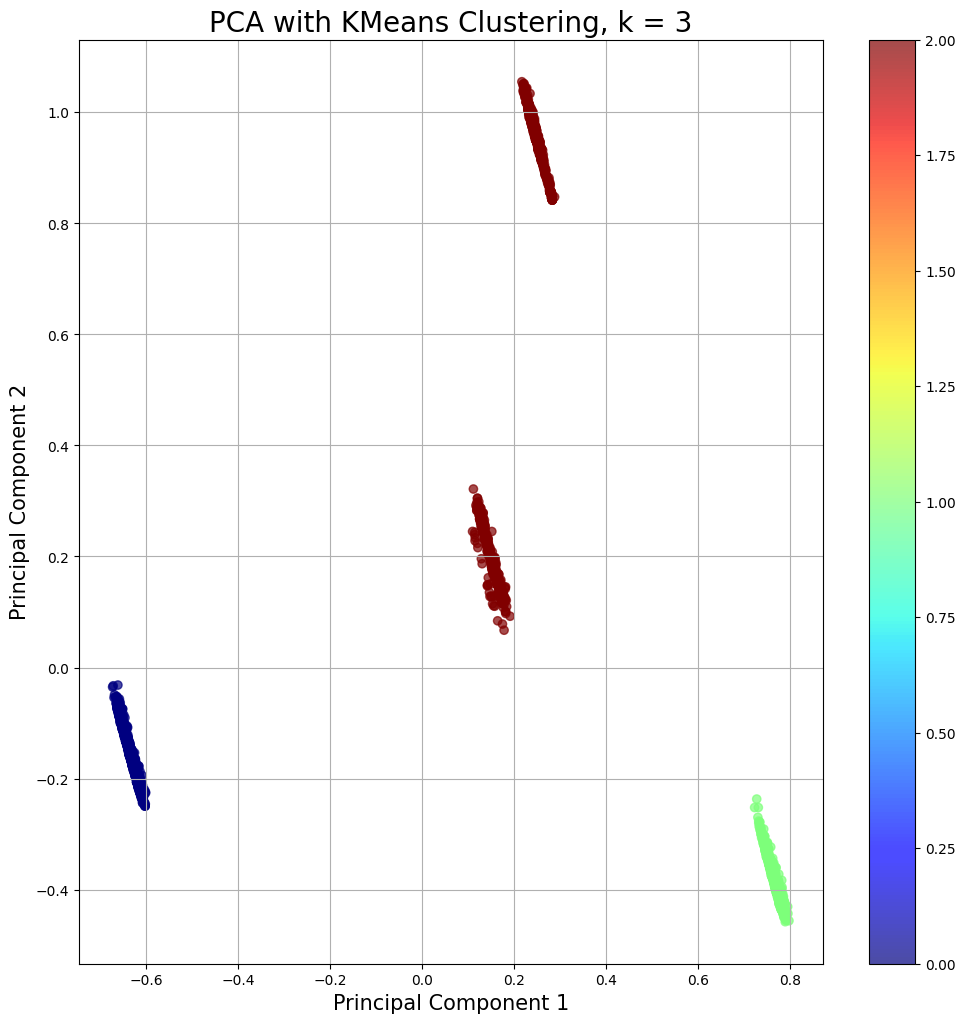

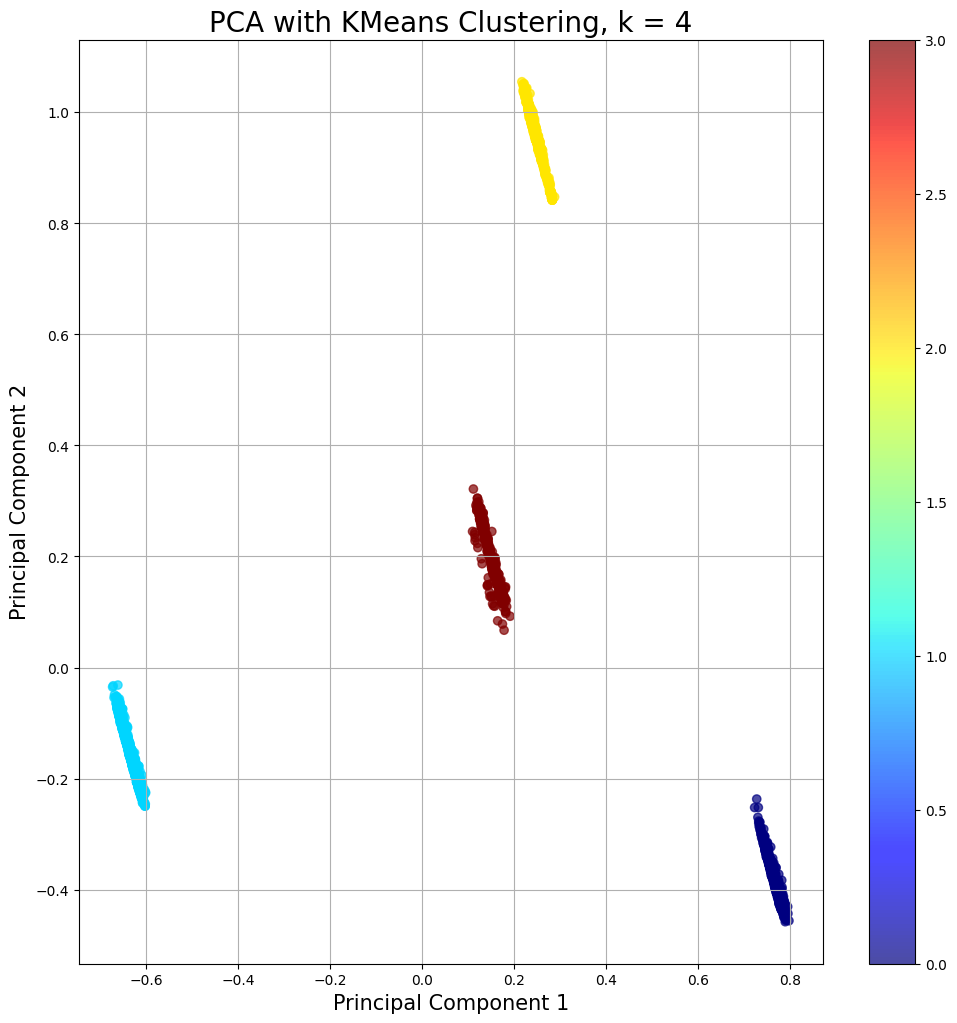

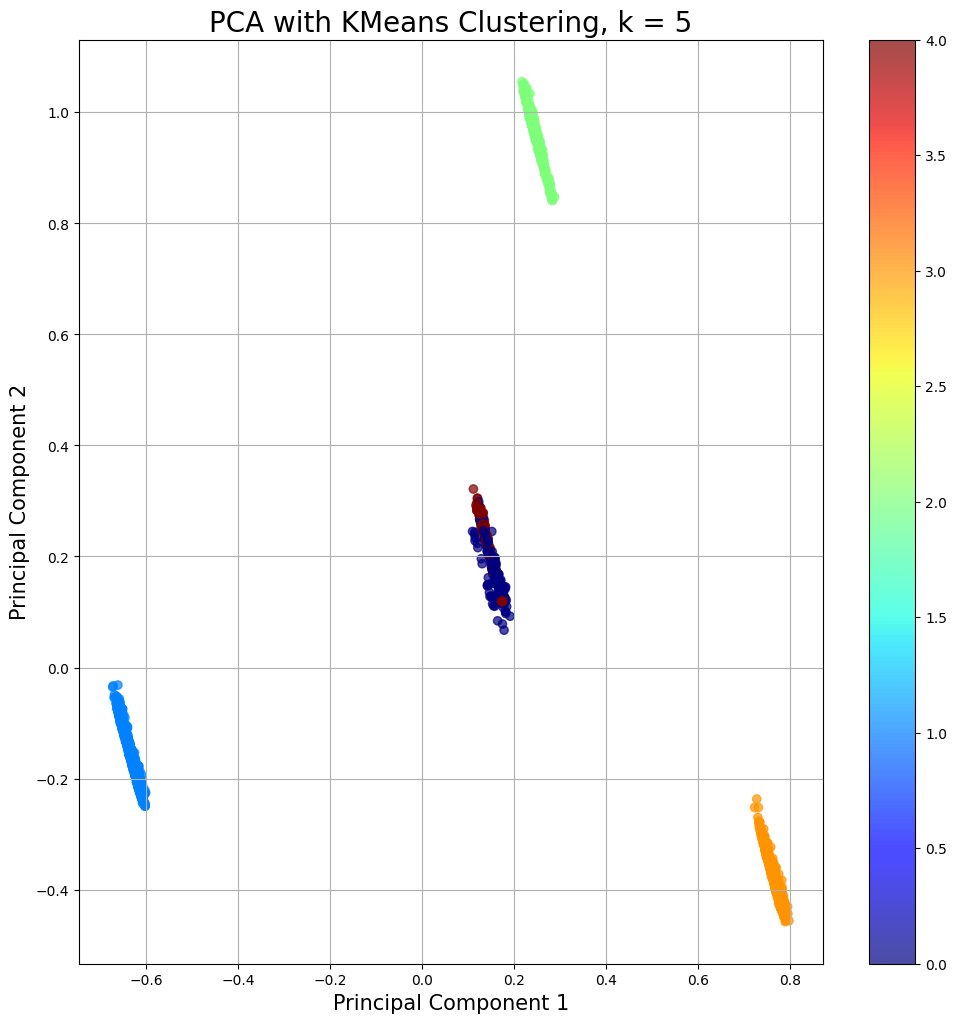

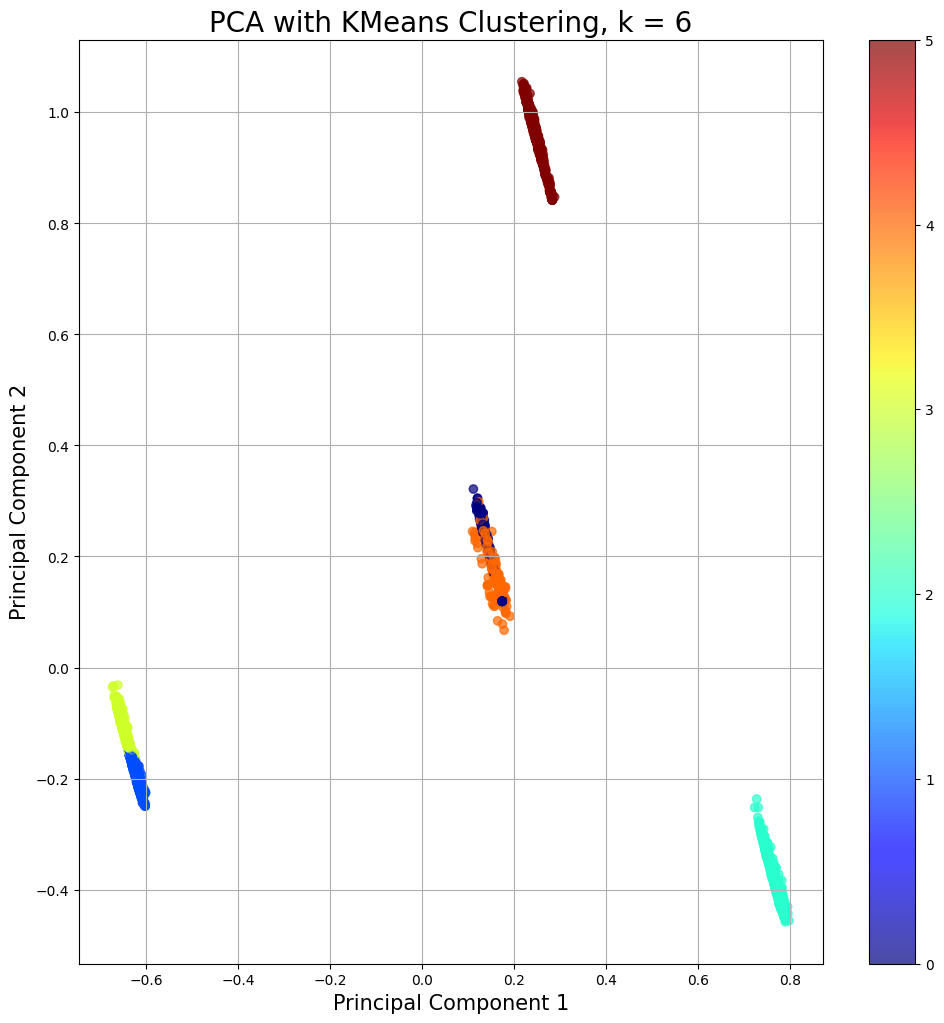

In [8]:
for k in [3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(data_transformed)
    labels = kmeans.labels_
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(data_transformed)
    principalDf = pd.DataFrame(data = principalComponents,
    columns = ['principal component 1', 'principal component 2'])
    fig = plt.figure(figsize = (12,12))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ss = ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'], alpha=0.7, c=labels, cmap='jet')
    plt.title('PCA with KMeans Clustering, k = ' + str(k), fontsize = 20)
    plt.colorbar(ss)
    ax.grid()

주성분 분석을 수행한 결과, 레드 와인과 동일하게 서로 명확하게 분리되는 군집이 4개가 있음을 알 수 있고, 따라서 위의 결과 중 k=4가 가장 최적임을 보여준다.

k가 4 미만이라면, 명확하게 분리가 되는 군집이더라도, 서로 거리가 가까운 군집 두 개를 하나의 군집으로 군집화 할 것이고, k가 4 초과라면 하나의 군집을 두개의 군집으로 나눌 것이다.

### TSNE

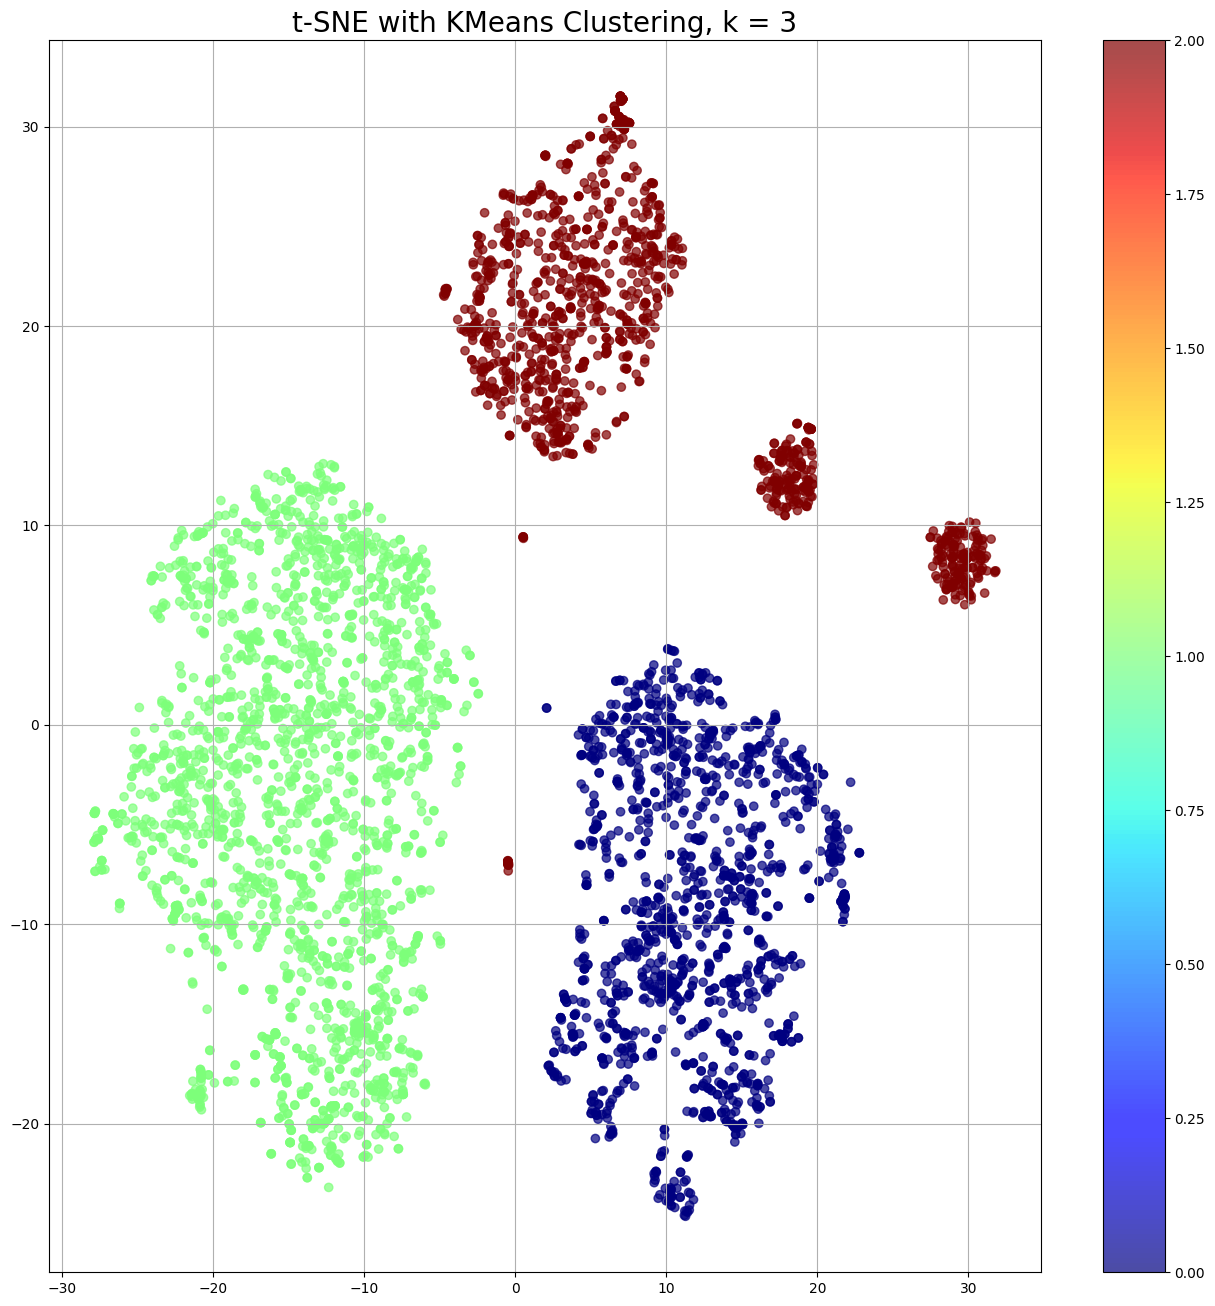

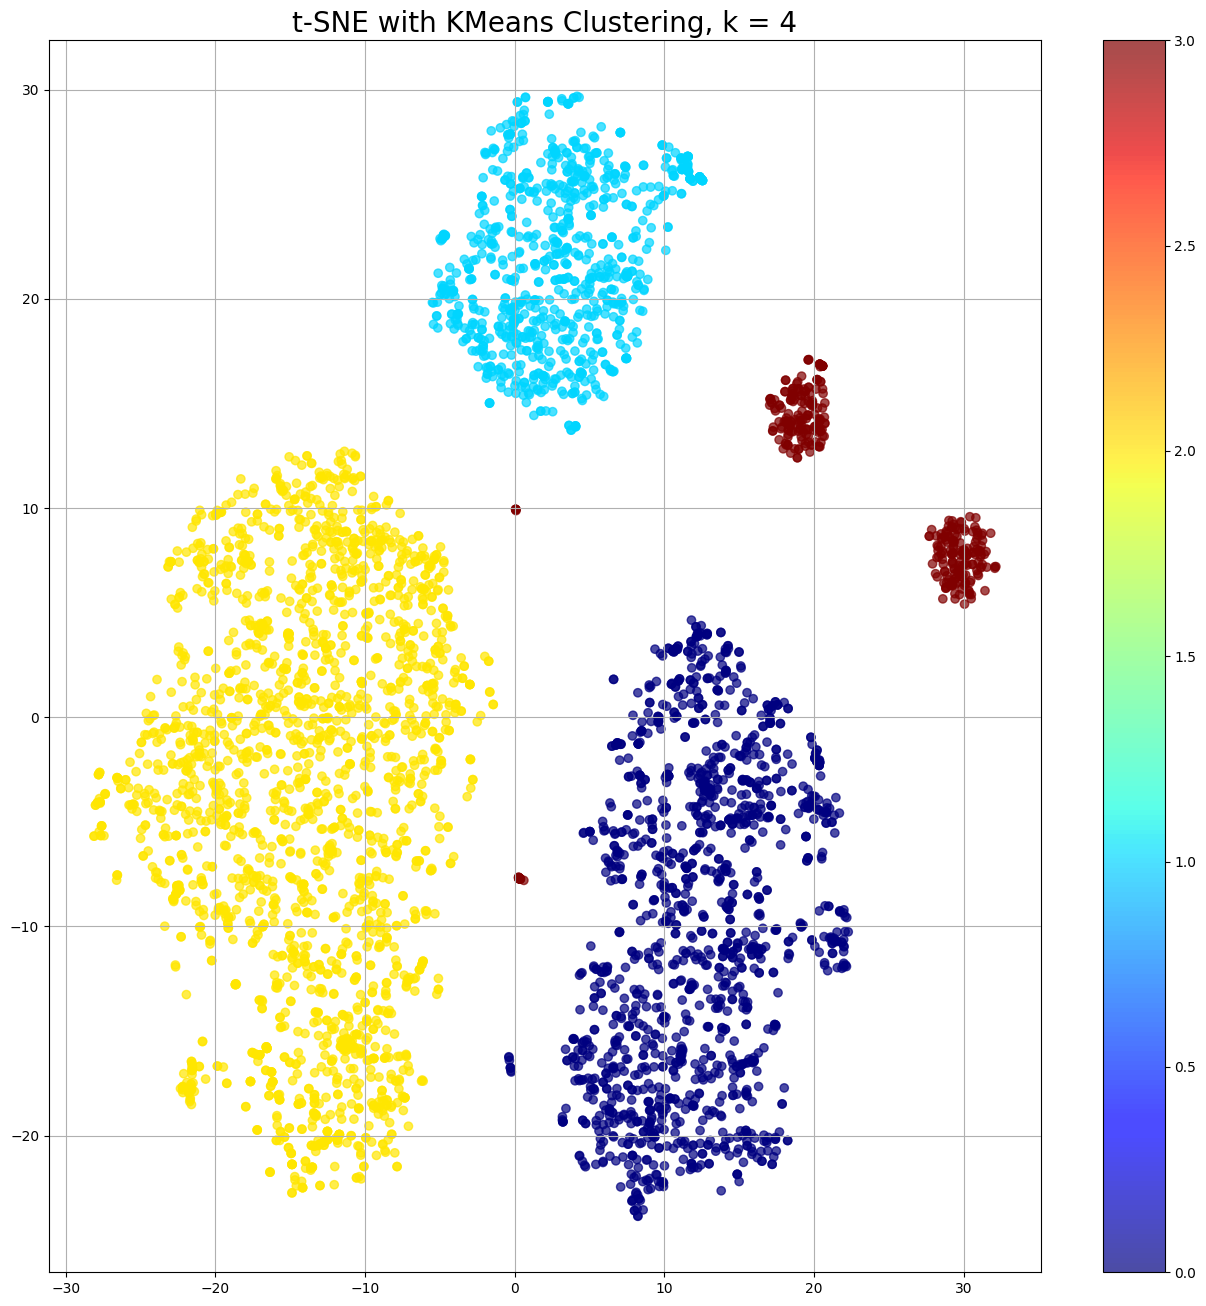

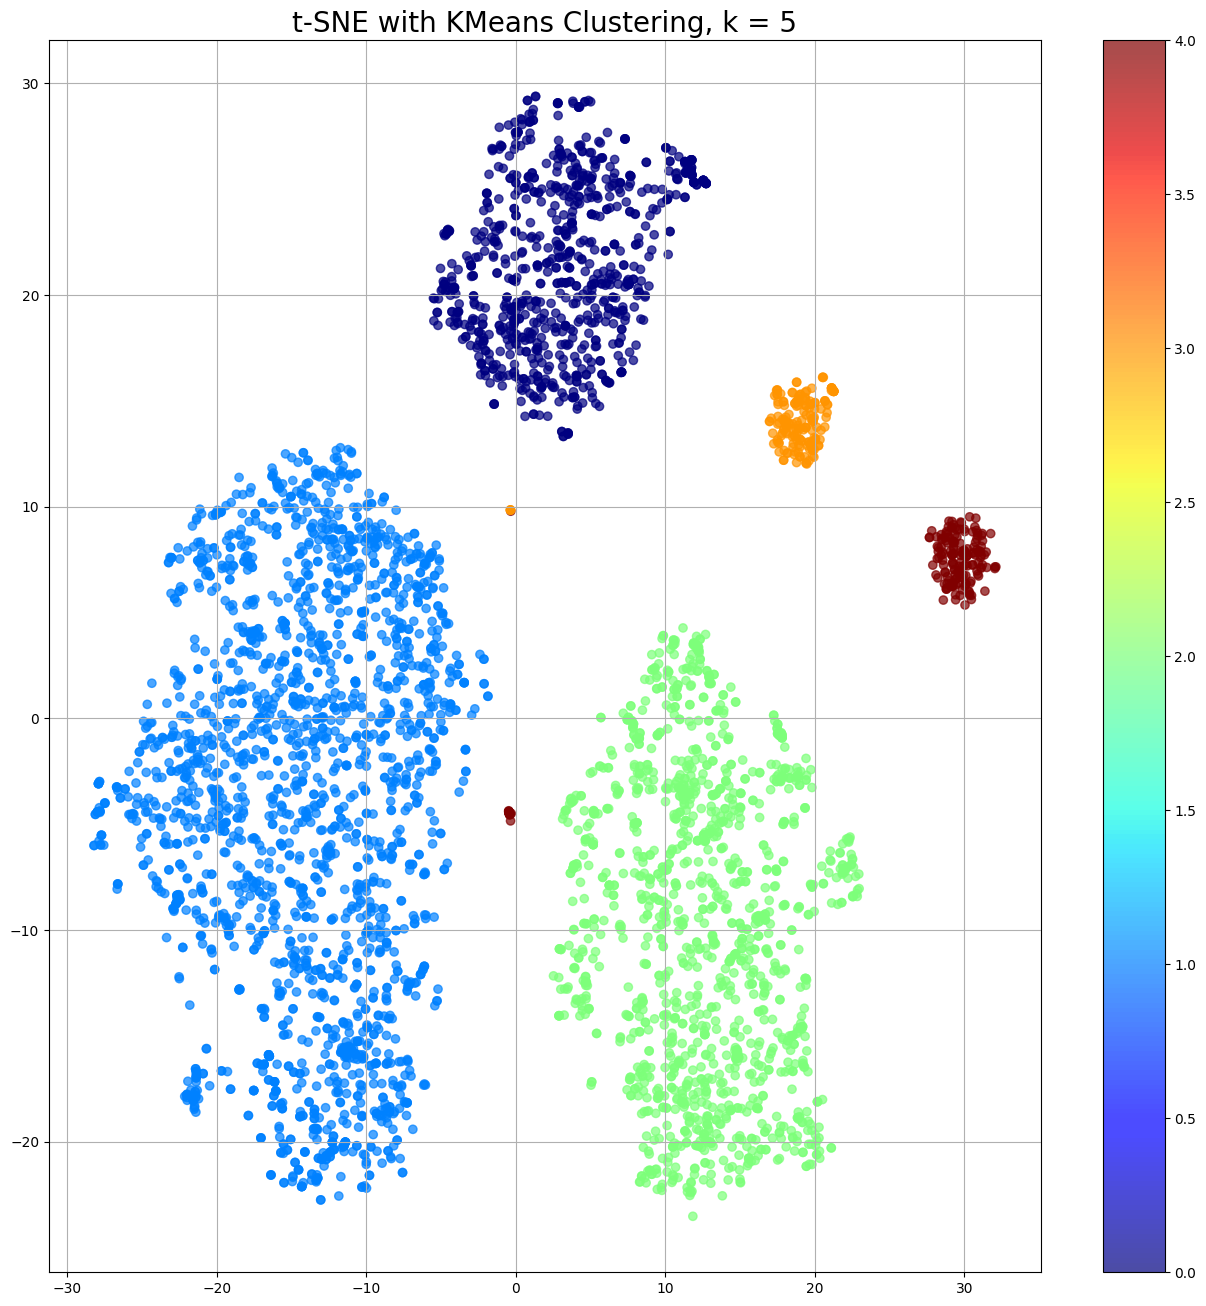

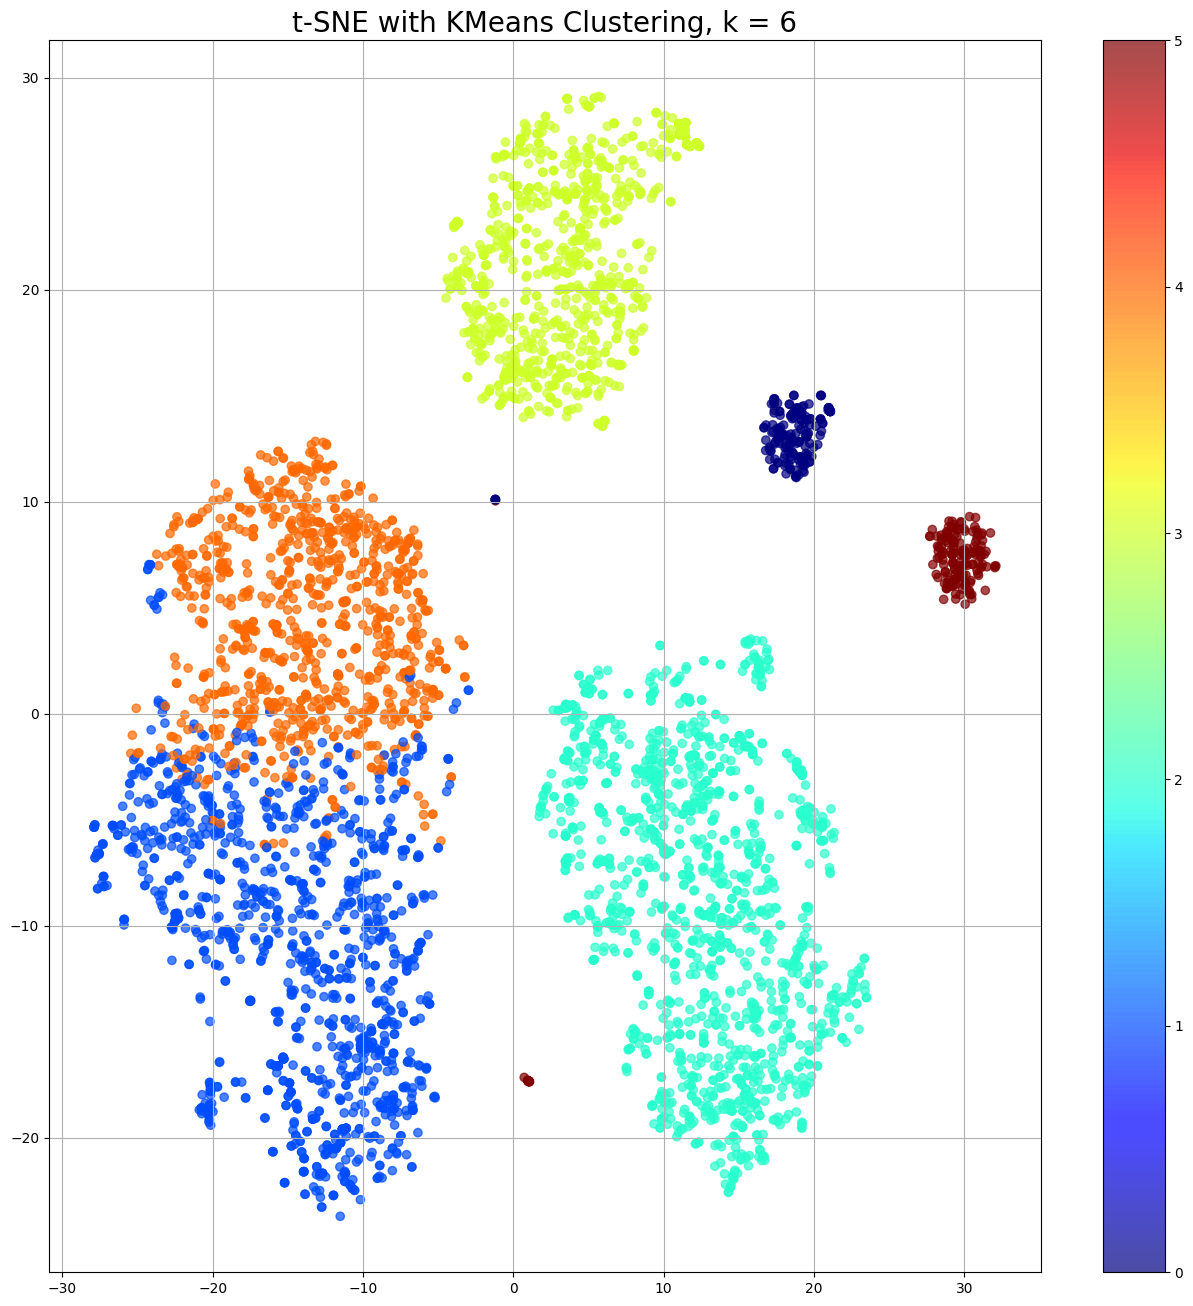

In [9]:
for k in [3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(data_transformed)
    labels = kmeans.labels_
    tsne = TSNE(perplexity=100, n_components=2, init='pca', n_iter=500)
    low_dim_embs = tsne.fit_transform(data_transformed)
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(1,1,1)
    # ax.set_title('Wine TSNE', fontsize = 20)
    ss = ax.scatter(low_dim_embs[:,0], low_dim_embs[:,1],
    alpha=0.7, c=labels, cmap='jet')
    plt.title('t-SNE with KMeans Clustering, k = ' + str(k), fontsize = 20)
    plt.colorbar(ss)
    ax.grid()

PCA와 마찬가지로, k=4, 5에서 가장 최적임을 확인할 수 있다. PCA에서는 명확하게 4개의 군집으로 나눠졌지만, t-SNE는 넓게 분산되어 표현되며 조금 다른 경향을 보여준다. PCA와 조금 결과가 다르므로, 둘 중 어떤 것을 사용할 지는 전적으로 사용자에게 달려있다. 다만, 보편적으로 t-SNE가 더 정교한 표현을 한다고 알려져 있다.

레드 와인과 화이트 와인 모두 명확한 군집이 존재하며 군집을 적당히 분리할 수 있다.